# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [120]:
%matplotlib inline
import warnings
from scipy import stats
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [121]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [122]:
hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [123]:
hospital_read_df.tail(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [124]:
hospital_read_df.tail(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16855,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16856,CROWNPOINT HEALTHCARE FACILITY,320062,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16858,GALLUP INDIAN MEDICAL CENTER,320061,NM,READM-30-AMI-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
16859,UNIVERSITY OF LOUISVILLE HOSPITAL,180141,KY,READM-30-HIP-KNEE-HRRP,Not Available,1.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [125]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [126]:
clean_hospital_read_df.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [127]:
clean_hospital_read_df.tail(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8818,"CHRISTIANA CARE HEALTH SERVICES, INC.",80001,DE,READM-30-HF-HRRP,2509,NaN,0.9712,21.8,22.5,546.0,07/01/2010,06/30/2013
572,"SOUTHCOAST HOSPITAL GROUP, INC",220074,MA,READM-30-COPD-HRRP,2565,NaN,1.1637,23.7,20.4,619.0,07/01/2010,06/30/2013
136,"BEAUMONT HOSPITAL, ROYAL OAK",230130,MI,READM-30-HIP-KNEE-HRRP,2581,NaN,1.2577,7.5,5.9,197.0,07/01/2010,06/30/2013
1698,FLORIDA HOSPITAL,100007,FL,READM-30-HIP-KNEE-HRRP,2596,NaN,1.0962,5.6,5.1,147.0,07/01/2010,06/30/2013
1242,FLORIDA HOSPITAL,100007,FL,READM-30-COPD-HRRP,2705,NaN,1.1148,22.0,19.7,603.0,07/01/2010,06/30/2013
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [128]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

### Replace NaN with 0 to treat them as outliers

In [129]:
clean_hospital_read_df = clean_hospital_read_df.groupby(['Hospital Name',
       'Number of Discharges', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions'],as_index=False).sum()
clean_hospital_read_df = clean_hospital_read_df.drop(['Provider Number','Footnote'],axis=1)

In [130]:
clean_hospital_read_df.head(10)

,Hospital Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,ABBEVILLE GENERAL HOSPITAL,44,1.0198,21.7,21.2,11.0
1,ABBEVILLE GENERAL HOSPITAL,163,1.0284,18.0,17.5,31.0
2,ABBEVILLE GENERAL HOSPITAL,206,1.1315,25.1,22.2,59.0
3,ABBOTT NORTHWESTERN HOSPITAL,281,0.9452,20.0,21.2,52.0
4,ABBOTT NORTHWESTERN HOSPITAL,294,0.9741,16.9,17.3,48.0
5,ABBOTT NORTHWESTERN HOSPITAL,584,0.8712,12.8,14.7,68.0
6,ABBOTT NORTHWESTERN HOSPITAL,629,1.0601,5.2,4.9,34.0
7,ABBOTT NORTHWESTERN HOSPITAL,750,0.9043,19.8,21.9,143.0
8,ABILENE REGIONAL MEDICAL CENTER,173,1.0400,15.0,14.4,28.0
9,ABILENE REGIONAL MEDICAL CENTER,216,0.9499,19.3,20.4,38.0


In [131]:
clean_hospital_read_df.tail(5)

,Hospital Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
11492,YUMA REGIONAL MEDICAL CENTER,483,1.0139,17.2,17.0,84.0
11493,YUMA REGIONAL MEDICAL CENTER,631,0.8834,19.5,22.1,116.0
11494,YUMA REGIONAL MEDICAL CENTER,633,0.9514,5.2,5.5,32.0
11495,YUMA REGIONAL MEDICAL CENTER,835,1.0590,21.5,20.3,184.0
11496,YUMA REGIONAL MEDICAL CENTER,1007,1.0760,18.5,17.2,191.0


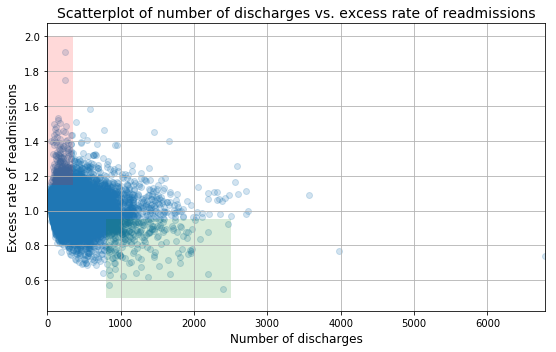

In [132]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

##### From the plot there is decrease in Excess rate of readmissions with increase in Number of Discharges.
##### Though there is a decreasing trend, There are some outliers in the green shade region, these outliers represent that though the Number of discharges increase, there is some increase in Readmission rate

#### Now Let's check  with number of discharges < 100 & number of discharges > 1000

In [156]:
df_discharges_lt_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100][['Excess Readmission Ratio']]
print("with number of discharges < 100 mean excess readmission rate is : ",df_discharges_lt_100.mean())
df_discharges_gt_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000][['Excess Readmission Ratio']]
print("with number of discharges > 1000 mean excess readmission rate is : ",df_discharges_gt_1000.mean())

with number of discharges < 100 mean excess readmission rate is :  Excess Readmission Ratio    1.022618
dtype: float64
with number of discharges > 1000 mean excess readmission rate is :  Excess Readmission Ratio    0.978335
dtype: float64


In [164]:
pi_hat_lt_100 = len(df_discharges_lt_100[df_discharges_lt_100['Excess Readmission Ratio'] > 1])/len(df_discharges_lt_100)
pi_hat_gt_100 = len(df_discharges_gt_1000[df_discharges_gt_1000['Excess Readmission Ratio'] > 1])/len(df_discharges_gt_1000)
print("{0} with number of discharges < 100 have excess readmission rate greater than 1 ".format(100 * pi_hat_lt_100 ))
print("{0}  with number of discharges > 1000 have excess readmission rate greater than 1 ".format(100 * pi_hat_gt_100))

63.215488215488215 with number of discharges < 100 have excess readmission rate greater than 1 
44.49244060475162  with number of discharges > 1000 have excess readmission rate greater than 1 


##### The statistics are correct from the results mentioned above

In [165]:
clean_hospital_read_df.head(2)

,Hospital Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
0,ABBEVILLE GENERAL HOSPITAL,44,1.0198,21.7,21.2,11.0
1,ABBEVILLE GENERAL HOSPITAL,163,1.0284,18.0,17.5,31.0


(0, 1.9926766004415013)

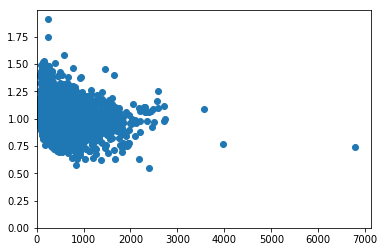

In [166]:
plt.scatter(x,y)
plt.xlim((0,None))
plt.ylim((0,None))

(0, 1.9791819530603627)

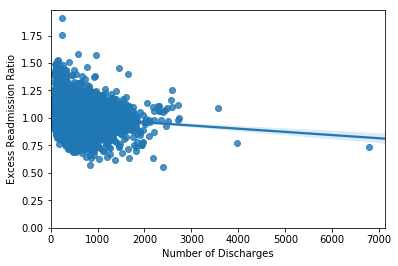

In [167]:
import seaborn as sns
sns.regplot(x='Number of Discharges',y='Excess Readmission Ratio',data=clean_hospital_read_df)
plt.xlim((0,None))
plt.ylim((0,None))

#### There is a negative correlation between Number of discharges and Excess Readmission Rate, but one cann't confirm this from the plot, lets check this with Hypothesis Testing

### Hypothesis Testing
#### Null Hypothesis ($H_{0}$) : There is no significant difference in readmission rate (>1) when number of discharges > 1000 & number of discharges < 100 ; ${\mu}_{>1000}$  - ${\mu}_{<100}$ = 0
#### Alternative Hypothesis ($H_{A}$) : There is no significant difference in readmission rate (>1) when number of discharges > 1000 & number of discharges < 100 ${\mu}_{>1000}$  - ${\mu}_{<100}$ > 0
#### Lets try with One-sided test
#### significance level alpha = 0.01

In [161]:
n_lt_100 = len(df_discharges_lt_100)
print("Sample Size(num_of_discharges < 100) : ",n_lt_100)
n_gt_1000 = len(df_discharges_gt_1000)
print("Sample Size(num_of_discharges > 1000) : ",n_gt_100)

Sample Size(num_of_discharges < 100) :  1188
Sample Size(num_of_discharges > 1000) :  1188


In [169]:
pi = 0
pi_hat = abs(pi_hat_gt_100 - pi_hat_lt_100)
sigma_hat = np.sqrt(pi_hat * (1-pi_hat) / n)
print("pi_hat : ", pi_hat)
print("sigma_hat : ",sigma_hat)

pi_hat :  0.18723047610736593
sigma_hat :  0.0113178453636


#### Calculate test statistic : Z-score

In [170]:
zscore = (pi_hat - pi)/sigma_hat
print("Test Statistic : Zscore : ",zscore)

Test Statistic : Zscore :  16.5429434749


#### Calculate p_Value

In [171]:
alpha = 0.01
p_Value = (1 - stats.norm.cdf(abs(zscore))) * 2
print("p_Value : ",p_Value)
if p_Value < 0.01:
    print("Rejecting Null Hypothesis(H_0) As the p_Value is < 0.01")

p_Value :  0.0
Rejecting Null Hypothesis(H_0) As the p_Value is < 0.01


#### From the one-sided test above the Null Hypothesis can be rejected as p_Value is less than 0.01(given significant level).


Text(0.5,1,'Number of Discharges < 100')

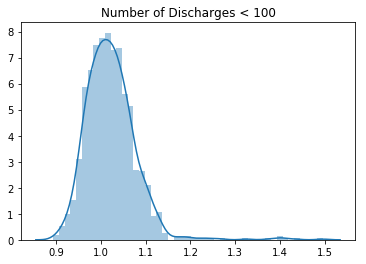

In [174]:
sns.distplot(df_discharges_lt_100)
plt.title("Number of Discharges < 100")

Text(0.5,1,'Number of Discharges > 1000')

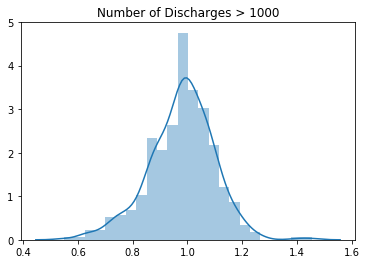

In [175]:
sns.distplot(df_discharges_gt_1000)
plt.title("Number of Discharges > 1000")

#### By Rejecting the Null Hypothesis ($H_{0}$), it is evident that there is a significant difference between the number of discharges < 100 and number of discharges > 1000. It means that the assumption(decreasing trend in Readmission rate as Number of discharges increase) formed earlier is valid, but to get more information on outiers, one has to check the effect of other